In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cmdstanpy import CmdStanModel
from baynes.plotter import FitPlotter
from baynes.model_utils import get_stan_file
import pandas as pd
from scipy import stats
import arviz as az
sns.set_style('ticks')
#sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1.6)
plt.rc("axes.spines", top=False, right=False)

In [4]:
fplot = FitPlotter(output_dir="/home/pietro/work/TESI/thesis/figures/ch2/poisson/", output_format='.pdf')

In [5]:
stan_file = get_stan_file('funnel.stan')
model = CmdStanModel(stan_file=stan_file,
                     cpp_options={'STAN_THREADS': True, 'jN': 4})
print(model.code())
fit = model.sample({},
                   chains=4,
                   iter_warmup=1000,
                   iter_sampling=1000,
                   save_warmup=True,
                   show_progress=True,
                   adapt_delta=0.9)
print(fit.diagnose())

22:34:11 - cmdstanpy - INFO - compiling stan file /home/pietro/work/TESI/baynes/stan/models/funnel/funnel.stan to exe file /home/pietro/work/TESI/baynes/stan/models/funnel/funnel


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/funnel/funnel.stan


22:34:18 - cmdstanpy - INFO - compiled model executable: /home/pietro/work/TESI/baynes/stan/models/funnel/funnel
22:34:18 - cmdstanpy - INFO - CmdStan start processing


parameters {
  real y;
  real x;
}
model {
  y ~ normal(0, 3);
  x ~ normal(0, exp(y));
}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:34:18 - cmdstanpy - INFO - CmdStan done processing.
22:34:18 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 475 divergent transitions (47.5%)
	Chain 2 had 80 divergent transitions (8.0%)
	Chain 3 had 167 divergent transitions (16.7%)
	Chain 4 had 56 divergent transitions (5.6%)
	Use function "diagnose()" to see further information.



Processing csv files: /tmp/tmpxgii71og/funnel__fktkzi/funnel-20230908223418_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpxgii71og/funnel__fktkzi/funnel-20230908223418_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpxgii71og/funnel__fktkzi/funnel-20230908223418_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpxgii71og/funnel__fktkzi/funnel-20230908223418_4.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
778 of 8000 (9.72%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.20, is below the nominal threshold of 0.30 which suggests 

(-2.0, 5.0)

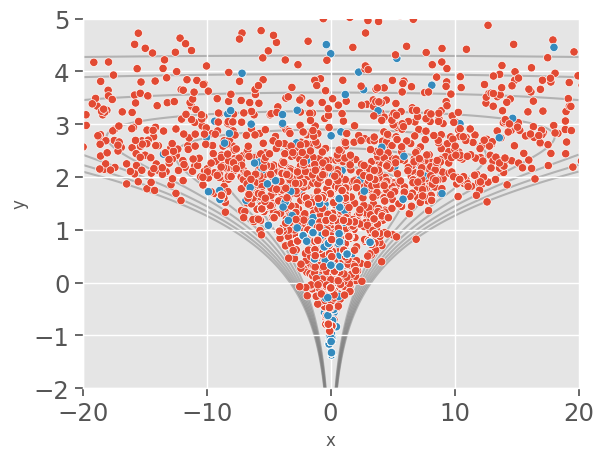

In [8]:
xmax=20
ymin, ymax = -2, 5
X = np.linspace(-xmax, xmax, 1001)
Y= np.linspace(ymin, ymax, 1001)
Z=[]
for y in Y:
    Z.append(stats.norm.pdf(X, 0, np.exp(y))* stats.norm.pdf(y, loc=0, scale=3))
Z = np.array(Z)
levels=Z[[900, 850, 800, 750, 700, 650, 600], 500]
ax = fplot.new_figure('funnel').subplots()
ax.contour(X, Y, Z, levels=levels, colors='grey', alpha=0.5, zorder=0)
sns.scatterplot(fit.draws_pd(), x='x', y='y', hue='divergent__', legend=False, ax=ax)
ax.set_xlim(-xmax, xmax)
ax.set_ylim(ymin,ymax)